In [2]:
pip install xgboost==1.7.6


Note: you may need to restart the kernel to use updated packages.


In [198]:
import pandas as pd
import ast
import os

In [390]:
import numpy as np

In [466]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        try:
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                    'category', categories=SUBSETS, ordered=True)
        except (ValueError, TypeError):
            # the categories and ordered arguments were removed in pandas 0.25
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                     pd.CategoricalDtype(categories=SUBSETS, ordered=True))

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks


In [468]:
tracks = load("../../../fma_metadata/tracks.csv")

In [472]:
all_features = pd.read_csv("../Important Data/all_features.csv",header=[0,1,2],index_col=[0])

In [203]:
features = load("../../../fma_metadata/features.csv")

In [474]:
track_genre = pd.DataFrame(tracks['track','genre_top'])

In [476]:
track_genre.columns = pd.MultiIndex.from_tuples([("","","genre_top")])

In [478]:
track_genre

,
,
,genre_top
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
20,NaN
...,...
155316,Rock


In [486]:
rest_track_genre = track_genre[~track_genre[("","","genre_top")].isin(["Rock","Electronic","Pop","Hip-Hop","Folk"])]

In [492]:
remaining_track_features = rest_track_genre.merge(all_features,left_index=True,right_index=True).drop([("","","genre_top")],axis=1)

In [498]:
remaining_track_features.to_csv("remaining_genre_all_features.csv")

In [207]:
# selected_track_genres = track_genre[track_genre['','','genre_top'].isin(["Rock","Electronic","Pop","Hip-Hop","Folk"])]

In [260]:
merged_data = track_genre.merge(features,left_index=True,right_index=True)

In [262]:
merged_data.dropna(inplace=True)

In [264]:
merged_data= merged_data.reset_index().set_index(["track_id",('','','genre_top')])

In [266]:
merged_data.index.rename(["track_id","genre_top"],inplace=True)

In [268]:
merged_data.reset_index(1,inplace=True)

In [270]:
merged_data

genre_top chroma_cens                                          \
                      kurtosis                                           
                            01        02        03        04        05   
track_id                                                                 
2          Hip-Hop    7.180653  5.230309  0.249321  1.347620  1.482478   
3          Hip-Hop    1.888963  0.760539  0.345297  2.295201  1.654031   
5          Hip-Hop    0.527563 -0.077654 -0.279610  0.685883  1.937570   
10             Pop    3.702245 -0.291193  2.196742 -0.234449  1.367364   
134        Hip-Hop    0.918445  0.674147  0.577818  1.281117  0.933746   
...            ...         ...       ...       ...       ...       ...   
155315        Rock   -0.319850  0.653044  1.300360 -0.606061 -1.109302   
155316        Rock   -0.490129  0.463834  2.321970 -0.084352  1.662914   
155317        Rock   -0.461559 -0.229601 -0.496632 -0.422033  0.130612   
155318        Rock    0.552473 -0.110498 -0.532014  0.263131 -0.224011   
155319        Rock   -0.176901  0.187208 -0.050664  0.368843  0.066005   

                                                  ...   tonnetz            \
                                                  ...       std             
                06        07        08        09  ...        04        05   
track_id                                          ...                       
2         0.531371  1.481593  2.691455  0.866868  ...  0.054125  0.012226   
3         0.067592  1.366848  1.054094  0.108103  ...  0.063831  0.014212   
5         0.880839 -0.923192 -0.927232  0.666617  ...  0.040730  0.012691   
10        0.998411  1.770694  1.604566  0.521217  ...  0.074358  0.017952   
134       0.078177  1.199204 -0.175223  0.925482  ...  0.058766  0.016322   
...            ...       ...       ...       ...  ...       ...       ...   
155315   -1.006683  0.059643  0.472580 -0.856436  ...  0.108577  0.016631   
155316    2.115189 -0.237794  5.695442  0.830353  ...  0.128410  0.022547   
155317   -0.263825 -0.628103 -0.082687 -0.229483  ...  0.132964  0.023548   
155318   -0.530972  1.713526  1.418444  1.325197  ...  0.108324  0.017540   
155319   -0.857354 -0.780860  0.626281 -0.630938  ...  0.088311  0.018328   

                          zcr                                          \
                     kurtosis       max      mean    median       min   
                06         01        01        01        01        01   
track_id                                                                
2         0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3         0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5         0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10        0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
134       0.015819   4.731087  0.419434  0.064370  0.050781  0.000000   
...            ...        ...       ...       ...       ...       ...   
155315    0.014705   6.947788  0.188477  0.037708  0.035156  0.002930   
155316    0.019816   4.448255  0.172852  0.028773  0.028320  0.003906   
155317    0.026527   3.270612  0.196289  0.031116  0.027832  0.002441   
155318    0.020471   2.356727  0.212891  0.038450  0.037109  0.003418   
155319    0.017936   6.188604  0.167480  0.041480  0.038086  0.004883   

                              
              skew       std  
                01        01  
track_id                      
2         2.089872  0.061448  
3         1.716724  0.069330  
5         2.193303  0.044861  
10        3.542325  0.040800  
134       1.806106  0.054623  
...            ...       ...  
155315    1.764233  0.018679  
155316    0.955388  0.012385  
155317    1.283060  0.019059  
155318    0.828569  0.017904  
155319    1.818740  0.020133  

[49598 rows x 519 columns]

In [272]:
selected_merged_data = merged_data[merged_data["genre_top"].isin(["Rock","Electronic","Pop","Hip-Hop","Folk"])]

In [274]:
selected_merged_data['genre_top'] = selected_merged_data['genre_top'].astype(object)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_74862/2834995332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_merged_data['genre_top'] = selected_merged_data['genre_top'].astype(object)


In [280]:
selected_merged_data['genre_top'].value_counts()

genre_top
Rock          14182
Electronic     9372
Hip-Hop        3552
Folk           2803
Pop            2332
Name: count, dtype: int64

In [278]:
merged_data["genre_top"].value_counts()

genre_top
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: count, dtype: int64

In [426]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [428]:
dictG = {"Rock":0,"Electronic":1,"Pop":2,"Hip-Hop":3,"Folk":4}

In [592]:
# pop_tracks = selected_merged_data[selected_merged_data["genre_top"] == "Pop"]
# non_pop_tracks = selected_merged_data[selected_merged_data["genre_top"] != "Pop"]

# # Split Pop tracks separately
# pop_train_val, pop_test = train_test_split(pop_tracks, test_size=0.15, random_state=42)
# pop_train, pop_val = train_test_split(pop_train_val, test_size=0.15, random_state=42)

# # Split Non-Pop tracks separately
# non_pop_train_val, non_pop_test = train_test_split(non_pop_tracks, test_size=0.15, random_state=42)
# non_pop_train, non_pop_val = train_test_split(non_pop_train_val, test_size=0.15, random_state=42)

# # Merge and shuffle
# train_data = pd.concat([pop_train, non_pop_train]).sample(frac=1, random_state=42).reset_index(drop=True)
# val_data = pd.concat([pop_val, non_pop_val]).sample(frac=1, random_state=42).reset_index(drop=True)
# test_data = pd.concat([pop_test, non_pop_test]).sample(frac=1, random_state=42).reset_index(drop=True)

# # Separate features (X) and target (y)
# x_train = train_data.drop(["genre_top"],axis=1)
# y_train = train_data['genre_top'].replace(dictG)

# x_val = val_data.drop(["genre_top"],axis=1)
# y_val = val_data['genre_top'].replace(dictG)

# x_test = test_data.drop(["genre_top"],axis=1)
# y_test = test_data['genre_top'].replace(dictG)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_74862/1259918934.py:18: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_train = train_data.drop(["genre_top"],axis=1)
/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_74862/1259918934.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = train_data['genre_top'].replace(dictG)
/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_74862/1259918934.py:21: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_val = val_data.drop(["genre_top"],axis=1)
/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_74862/1259918934.py:22: FutureWarning: Downcastin

In [616]:
y_test.value_counts()

genre_top
0    2137
1    1400
3     524
4     426
2     350
Name: count, dtype: int64

In [624]:
X = selected_merged_data.drop(["genre_top"],axis=1)
y = selected_merged_data['genre_top'].replace(dictG)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_74862/41724156.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = selected_merged_data.drop(["genre_top"],axis=1)
/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_74862/41724156.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = selected_merged_data['genre_top'].replace(dictG)


In [626]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [368]:
X

chroma_cens                                                    \
            kurtosis                                                     
                  01        02        03        04        05        06   
track_id                                                                 
2           7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3           1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5           0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10          3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
134         0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   
...              ...       ...       ...       ...       ...       ...   
155315     -0.319850  0.653044  1.300360 -0.606061 -1.109302 -1.006683   
155316     -0.490129  0.463834  2.321970 -0.084352  1.662914  2.115189   
155317     -0.461559 -0.229601 -0.496632 -0.422033  0.130612 -0.263825   
155318      0.552473 -0.110498 -0.532014  0.263131 -0.224011 -0.530972   
155319     -0.176901  0.187208 -0.050664  0.368843  0.066005 -0.857354   

                                                  ...   tonnetz            \
                                                  ...       std             
                07        08        09        10  ...        04        05   
track_id                                          ...                       
2         1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3         1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5        -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10        1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
134       1.199204 -0.175223  0.925482  1.438509  ...  0.058766  0.016322   
...            ...       ...       ...       ...  ...       ...       ...   
155315    0.059643  0.472580 -0.856436 -0.524676  ...  0.108577  0.016631   
155316   -0.237794  5.695442  0.830353  1.951819  ...  0.128410  0.022547   
155317   -0.628103 -0.082687 -0.229483 -0.492753  ...  0.132964  0.023548   
155318    1.713526  1.418444  1.325197  0.120333  ...  0.108324  0.017540   
155319   -0.780860  0.626281 -0.630938 -0.787229  ...  0.088311  0.018328   

                          zcr                                          \
                     kurtosis       max      mean    median       min   
                06         01        01        01        01        01   
track_id                                                                
2         0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3         0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5         0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10        0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
134       0.015819   4.731087  0.419434  0.064370  0.050781  0.000000   
...            ...        ...       ...       ...       ...       ...   
155315    0.014705   6.947788  0.188477  0.037708  0.035156  0.002930   
155316    0.019816   4.448255  0.172852  0.028773  0.028320  0.003906   
155317    0.026527   3.270612  0.196289  0.031116  0.027832  0.002441   
155318    0.020471   2.356727  0.212891  0.038450  0.037109  0.003418   
155319    0.017936   6.188604  0.167480  0.041480  0.038086  0.004883   

                              
              skew       std  
                01        01  
track_id                      
2         2.089872  0.061448  
3         1.716724  0.069330  
5         2.193303  0.044861  
10        3.542325  0.040800  
134       1.806106  0.054623  
...            ...       ...  
155315    1.764233  0.018679  
155316    0.955388  0.012385  
155317    1.283060  0.019059  
155318    0.828569  0.017904  
155319    1.818740  0.020133  

[32241 rows x 518 columns]

In [540]:
y.value_counts()

genre_top
0    14182
1     9372
3     3552
4     2803
2     2332
Name: count, dtype: int64

In [566]:
pop_tracks = y[y == 2]
non_pop_tracks = y[y != 2]


In [ ]:
non_pop_train_val, non_pop_test = train_test_split(non_pop_tracks, test_size=0.2, random_state=42)
non_pop_train, non_pop_val = train_test_split(non_pop_train_val, test_size=0.2, random_state=42)


In [ ]:

pop_train_val, pop_test = train_test_split(pop_tracks, test_size=0.2, random_state=42)  # Keep 20% in test
pop_train, pop_val = train_test_split(pop_train_val, test_size=0.2, random_state=42)    # 20% of pop-train for val


In [546]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,stratify=y)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5,stratify=y_temp)

In [594]:
model = LogisticRegression()

In [576]:
# train_losses= []
# val_losses= []
# test_losses = []
# train_accuracies= []
# val_accuracies= []
# test_accuracies = []

# max_trees = 100  # or 200 if you want bigger growth

# for n in range(1, max_trees+1):
#     model.n_estimators = n
#     model.fit(x_train, y_train)
    
#     # Predict probabilities
#     train_probs = model.predict_proba(x_train)
#     val_probs = model.predict_proba(x_val)
#     test_probs = model.predict_proba(x_test)
    
#     # Log loss
#     train_losses.append(log_loss(y_train, train_probs))
#     val_losses.append(log_loss(y_val, val_probs))
#     test_losses.append(log_loss(y_test, test_probs))
    
#     # Accuracy
#     train_accuracies.append(accuracy_score(y_train, model.predict(x_train)))
#     val_accuracies.append(accuracy_score(y_val, model.predict(x_val)))
#     test_accuracies.append(accuracy_score(y_test, model.predict(x_test)))

In [443]:

val_accuracies

[0.5638957816377171,
 0.5835401157981803,
 0.6215880893300249,
 0.6389578163771712,
 0.6596360628618693,
 0.6610835401157982,
 0.6652191894127378,
 0.6792803970223326,
 0.6834160463192721,
 0.6914805624483044,
 0.6900330851943756,
 0.7024400330851944,
 0.6937551695616212,
 0.7045078577336642,
 0.6978908188585607,
 0.7011993382961125,
 0.7047146401985112,
 0.7113316790736146,
 0.7088502894954508,
 0.7187758478081059,
 0.7140198511166254,
 0.7119520264681555,
 0.7105045492142267,
 0.7121588089330024,
 0.7189826302729528,
 0.7193961952026469,
 0.71712158808933,
 0.7200165425971877,
 0.7222911497105046,
 0.7231182795698925,
 0.7235318444995864,
 0.7227047146401985,
 0.7231182795698925,
 0.7136062861869313,
 0.7214640198511166,
 0.7233250620347395,
 0.7193961952026469,
 0.7220843672456576,
 0.717328370554177,
 0.7268403639371381,
 0.7245657568238213,
 0.7262200165425972,
 0.7239454094292804,
 0.7210504549214226,
 0.7247725392886684,
 0.7239454094292804,
 0.7212572373862697,
 0.7222911497105

In [410]:
# import matplotlib.pyplot as plt

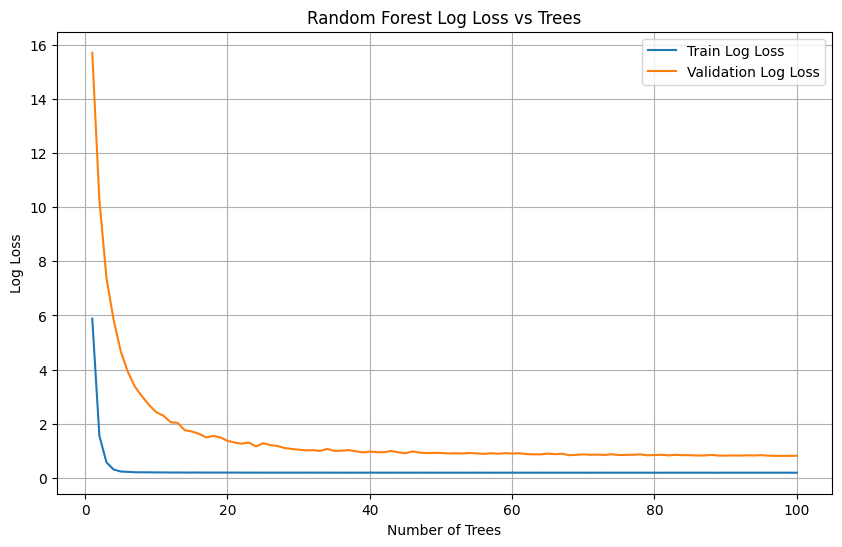

In [420]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1, max_trees+1), train_losses, label='Train Log Loss')
# plt.plot(range(1, max_trees+1), val_losses, label='Validation Log Loss')
# # plt.plot(range(1, max_trees+1), test_losses, label='Test Log Loss')
# plt.xlabel('Number of Trees')
# plt.ylabel('Log Loss')
# plt.title('Random Forest Log Loss vs Trees')
# plt.legend()
# plt.grid()
# plt.show()


In [628]:
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [462]:
import pickle
with open("base_classification_model_logistic_regression.pkl", 'wb') as file:
        pickle.dump(model, file)

In [632]:
y_pred_train = model.predict(x_train)

In [634]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74     14718
           1       0.67      0.53      0.59      9536
           2       0.00      0.29      0.00         7
           3       0.08      0.51      0.14       439
           4       0.22      0.44      0.29      1092

    accuracy                           0.60     25792
   macro avg       0.36      0.49      0.35     25792
weighted avg       0.75      0.60      0.66     25792



In [602]:
y_pred_val = model.predict(x_val)

In [604]:
print(classification_report(y_pred_val,y_val))

              precision    recall  f1-score   support

           0       0.85      0.66      0.75      2282
           1       0.63      0.53      0.57      1442
           2       0.00      0.00      0.00         0
           3       0.14      0.53      0.22       129
           4       0.29      0.41      0.34       259

    accuracy                           0.59      4112
   macro avg       0.38      0.43      0.38      4112
weighted avg       0.72      0.59      0.64      4112



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [640]:
y_pred = model.predict(x_test)

In [642]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.74      2837
           1       0.53      0.67      0.59      1875
           2       0.00      0.00      0.00       466
           3       0.50      0.07      0.13       710
           4       0.42      0.21      0.28       561

    accuracy                           0.60      6449
   macro avg       0.42      0.36      0.35      6449
weighted avg       0.53      0.60      0.54      6449



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [386]:
from sklearn.metrics import log_loss
train_loss = log_loss(y_train, y_pred_train)
val_loss = log_loss(y_val, y_pred_val)
print(f"Log Loss: {val_loss}")


Log Loss: 0.8719434806304682


In [392]:
# Get correct class probabilities
correct_class_probs = val_loss[np.arange(len(y_val)), y_val]

# Calculate negative log probabilities
neg_log_probs = -np.log(correct_class_probs)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(neg_log_probs, bins=30, color='blue', edgecolor='black')
plt.title('Negative Log-Likelihood Distribution (Random Forest)')
plt.xlabel('Negative Log Probability')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()


TypeError: 'float' object is not subscriptable

In [81]:
evals_result = model.evals_result()

AttributeError: 'LogisticRegression' object has no attribute 'evals_result'

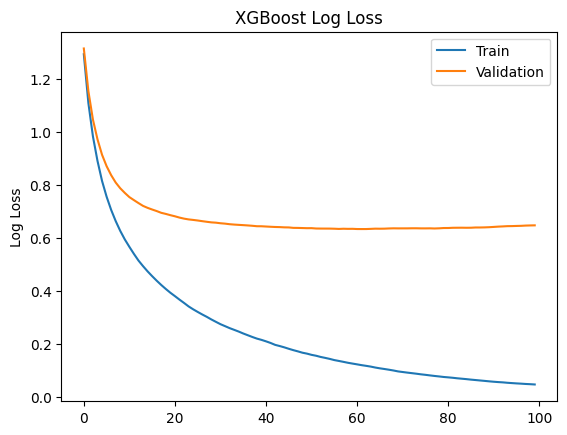

In [74]:
import matplotlib.pyplot as plt
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Validation')
plt.legend(); plt.ylabel('Log Loss'); plt.title('XGBoost Log Loss'); plt.show()

In [306]:
y_all = model.predict_proba(X)

In [308]:
base_data_prob_over = pd.DataFrame(y_all,index=X.index,columns=["Rock","Electronic","Pop","Hip-Hop","Folk"])

In [310]:
base_data_prob_over.to_csv("base_data_prob_overfitting_logistic.csv")

In [313]:
bank_acc = pd.read_csv("./Optimized Model/bank_acc.csv",index_col=[0],header=[0,1,2])

In [315]:
bank_acc

chroma_cens                                                              \
     kurtosis                                                               
           01        02        03        04        05        06        07   
0   -0.363607  0.010086 -1.228869 -1.166695  0.106115  1.132824  2.960157   

                                 ... mel_spec                               \
                                 ...      std                                
         08        09        10  ...       90        91        92       93   
0 -0.359578  0.287732  4.898821  ...  0.00052  0.000502  0.000493  0.00048   

                                                               
                                                               
         94        95        96        97        98        99  
0  0.000468  0.000465  0.000448  0.000448  0.000439  0.000441  

[1 rows x 1414 columns]

In [321]:
bank_acc_bad_prob = model.predict_proba(bank_acc.drop('mel_spec',axis=1))

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_74862/534433783.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  bank_acc_bad_prob = model.predict_proba(bank_acc.drop('mel_spec',axis=1))


In [327]:
pd.DataFrame(bank_acc_bad_prob).to_csv("bank_acc_bad_prob_logistic.csv")

In [109]:
# central_cee_hiphop = pd.read_csv("central_cee_hiphop.csv",index_col=[0],header=[0,1,2])

In [113]:
# central_cee_hiphop.drop('mel_spec',axis=1,inplace=True)

In [115]:
# central_cee_hiphop_prob = model.predict_proba(central_cee_hiphop)

In [121]:
# pd.DataFrame(central_cee_hiphop_prob).to_csv("central_cee_hiphop_prob.csv")